In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from scipy import stats

In [6]:
df_rotten_tomatoes_critic = pd.read_csv("data/zippedData/rotten_tomatoes_critic_reviews.csv.gz")

In [7]:
df_rotten_tomatoes_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [8]:
df_rotten_tomatoes_critic.dropna()
#dropping null values

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [9]:
df_rotten_tomatoes_movies = pd.read_csv("data/zippedData/rotten_tomatoes_movies.csv.gz")
df_rotten_tomatoes_movies.head(1)
#importing and first row

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [10]:
df_rotten_tomatoes_movies_clean = df_rotten_tomatoes_movies.drop(['tomatometer_count','critics_consensus', 'rotten_tomatoes_link', 'movie_info', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company'], axis=1).dropna()
df_rotten_clean = df_rotten_tomatoes_movies_clean.sort_values(by=['audience_count','tomatometer_rating','audience_rating'], ascending = False).head()
df_rotten_clean
#took the df and dropped extra colmns and then sorted them by audience tomato meter and audience

,movie_title,content_rating,genres,runtime,tomatometer_status,tomatometer_rating,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
16297,Titanic,PG-13,"Drama, Romance",195.0,Certified-Fresh,89.0,Upright,69.0,35797635.0,62,171,21
15410,The Lord of the Rings: The Return of the King,PG-13,"Action & Adventure, Classics, Science Fiction ...",200.0,Certified-Fresh,93.0,Upright,86.0,34679773.0,53,257,18
13694,Spider-Man,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",116.0,Certified-Fresh,90.0,Upright,67.0,34297354.0,47,220,25
13276,Shrek 2,PG,"Animation, Comedy, Kids & Family, Science Fict...",92.0,Certified-Fresh,89.0,Upright,69.0,34232524.0,53,209,27
7526,Harry Potter and the Goblet of Fire,PG-13,"Action & Adventure, Kids & Family, Science Fic...",157.0,Certified-Fresh,88.0,Upright,74.0,34153607.0,53,224,31


In [12]:
df_tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz")

In [13]:
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
df_tn_movie_budgets =  pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")

In [15]:
df_tn_movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [17]:
df_tmdb_data = pd.read_csv("data/zippedData/tmdb_movies_data.csv")
df_tmdb_data
#importing data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [18]:
df_tmdb_clean = df_tmdb_data.drop(['cast','homepage','tagline','overview','production_companies', 'keywords'], axis=1 )
df_tmdb_clean
#dropped tons of useless coluumns

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [19]:
df_temp = df_tmdb_clean[df_tmdb_clean['revenue'] !=0]

In [20]:
df_temp = df_temp[df_temp['budget']!=0]
df_temp
#cleaned data with no 0s in revenue and budget

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,6/21/1966,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,7/13/1966,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,12/17/1966,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/1966,28,7.0,1966,8.061618e+07,1.343603e+08


In [87]:
df_temp['genres'] = df_temp['genres'].str.split("|")
df_temp = df_temp.explode('genres')
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [27]:
df_averages = df_temp.groupby(['genres']).mean()
df_averages

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


Text(0.5, 1.0, 'Average Budget per Genre')

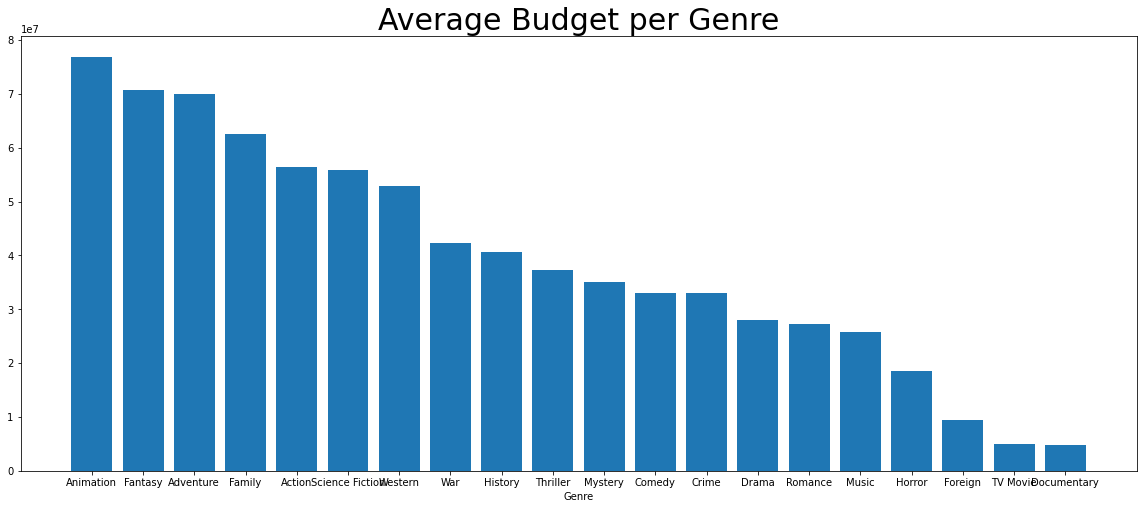

In [36]:
budget_averages = df_averages['budget'].sort_values(ascending = False)
budget_averages

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(budget_averages.index, budget_averages)
ax.set_xlabel('Genre')
ax.set_title('Average Budget per Genre', fontsize=30)


Text(0.5, 1.0, 'Average Revenue per Genre')

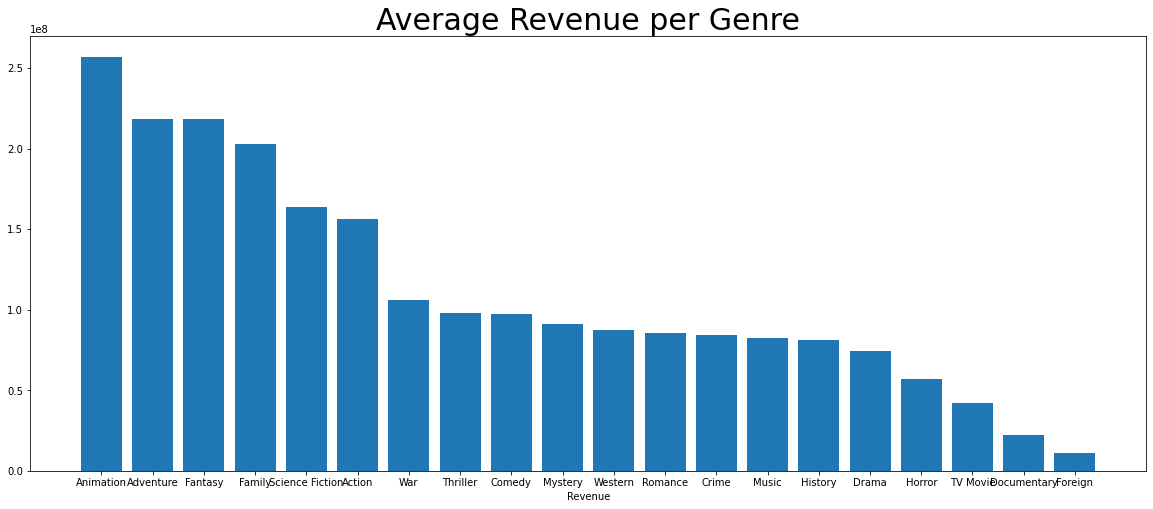

In [34]:
revenue_averages = df_averages['revenue'].sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(revenue_averages.index, revenue_averages)
ax.set_xlabel('Revenue')
ax.set_title('Average Revenue per Genre', fontsize=30)

In [183]:
df_averages

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


In [68]:
df_budget_rev = (df_averages[["budget","revenue"]]/1000000).sort_values(['revenue'], ascending = True)
df_budget_rev

,budget,revenue
genres,,
Foreign,9.430669,11.115958
Documentary,4.852976,22.524400
TV Movie,5.000000,42.000000
Horror,18.566308,57.287804
Drama,28.053492,74.285513
History,40.705216,81.405236
Music,25.782059,82.667588
Crime,33.031085,84.015522
Romance,27.275335,85.748008


In [89]:
df_temp = df_temp[(np.abs(stats.zscore(df_temp['budget'])) < 3)]
df_temp = df_temp[(np.abs(stats.zscore(df_temp['budget'])) > -3)]
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Thriller,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,12/25/2015,3929,7.2,2015,124199945.4,490314247.0
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Drama,12/25/2015,3929,7.2,2015,124199945.4,490314247.0


In [184]:
df_averages_nsd = df_temp.groupby(['genres']).mean()
df_budget_rev_nsd = (df_averages_nsd[["budget","revenue"]]/1000000).sort_values(['revenue'], ascending = True)
df_budget_rev_nsd

,budget,revenue
genres,,
Foreign,9.430669,11.115958
Documentary,4.852976,22.524400
TV Movie,5.000000,42.000000
Horror,17.578697,54.579960
Drama,26.149357,68.689735
Crime,30.911769,74.674614
History,37.367783,75.217419
Romance,26.242671,80.773669
Thriller,32.768379,82.360782


In [134]:
differnce_between = df_budget_rev_nsd['revenue']-df_budget_rev_nsd['budget']
differnce_between.sort_values(ascending=False)

genres
Animation          144.407806
Family             111.750411
Adventure          101.360677
Fantasy            100.188848
Science Fiction     69.529987
Action              68.352107
Comedy              58.849703
Music               56.885528
War                 55.374690
Romance             54.530998
Western             51.771627
Mystery             51.311297
Thriller            49.592403
Crime               43.762845
Drama               42.540378
History             37.849637
Horror              37.001263
TV Movie            37.000000
Documentary         17.671424
Foreign              1.685289
dtype: float64

<ipython-input-185-a7f7012e67ca>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


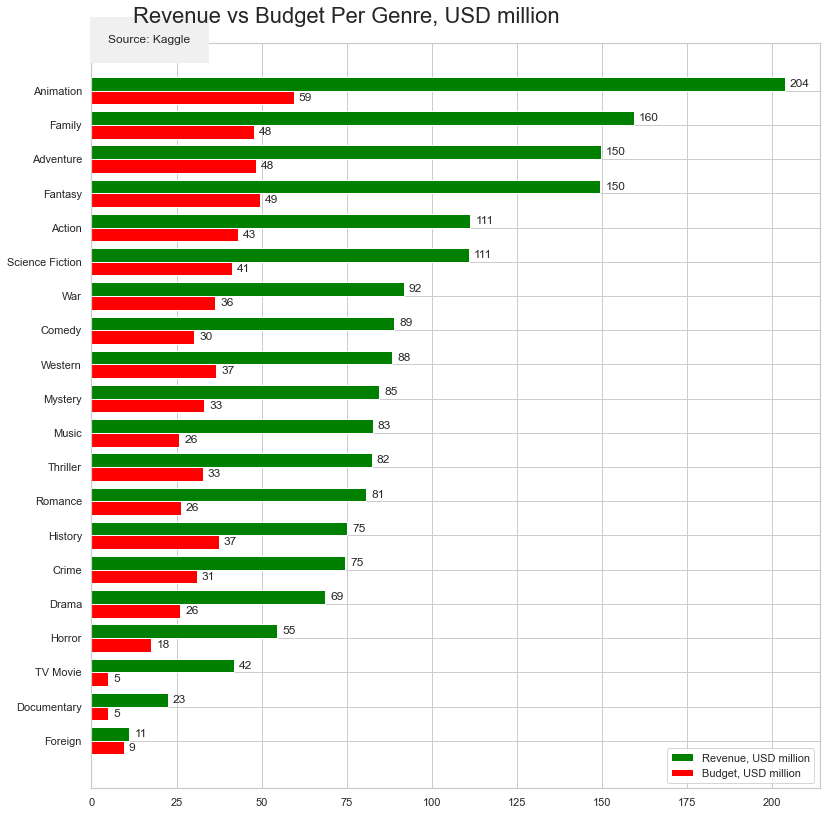

In [185]:
first_bar = df_budget_rev_nsd['revenue']
first_bar_label = 'Revenue, USD million'
first_bar_color = 'green'
second_bar = df_budget_rev_nsd['budget']
second_bar_label = 'Budget, USD million'
second_bar_color = 'red'
labels = df_budget_rev_nsd.index
width = 0.4  # the width of the bars
plot_title = 'Revenue vs Budget Per Genre, USD million'
title_size = 22
subtitle = 'Source: Kaggle'   
df_budget_rev_nsd.sort_values(by='revenue', inplace=True, ascending=True) 
fig, ax = plt.subplots(figsize=(16,12))
plt.tight_layout() #make the bars neater
            
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
            
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))
            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)
            
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0));
    

In [213]:
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Thriller,3/18/2015,2480,6.3,2015,101199955.5,271619025.4
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,12/25/2015,3929,7.2,2015,124199945.4,490314247.0
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Drama,12/25/2015,3929,7.2,2015,124199945.4,490314247.0


In [210]:
#creating pop and runtime column to get average of runtime
top_20_pop = df_temp[['popularity','runtime']]
top_20_pop = top_20_pop.sort_values(by="popularity", ascending=False).head(20)
top_20_pop

,popularity,runtime
2,13.112507,119
2,13.112507,119
2,13.112507,119
1329,12.037933,121
1329,12.037933,121
1329,12.037933,121
632,11.422751,101
632,11.422751,101
633,10.739009,123
633,10.739009,123


In [214]:
top_20_rt = top_20_pop['runtime']
top_20_rt

2       119
2       119
2       119
1329    121
1329    121
1329    121
632     101
632     101
633     123
633     123
633     123
5       156
5       156
5       156
5       156
2409    139
2633    178
2633    178
2633    178
636     113
Name: runtime, dtype: int64

(80.0, 200.0)

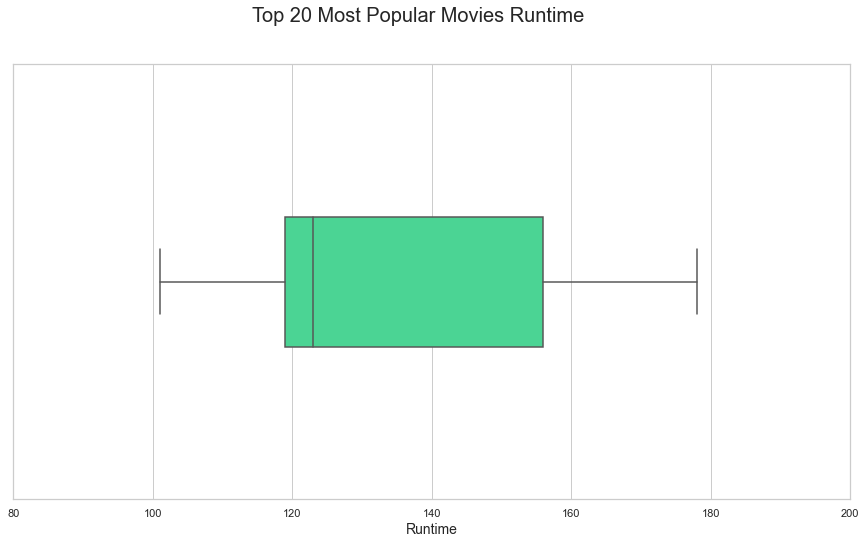

In [224]:
#boxplot = sns.boxplot( x=top_20_pop["runtime"], width = .3,);
#boxplot.axes.set_title("Top 20 Most Popular Movies Runtime", fontsize=16)
#boxplot.set_xlabel("Runtime", fontsize=14)

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_pop["runtime"], width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(80,200)

In [130]:
#average run time
top_20_pop['runtime'].mean(axis=0).round(2)
#turn into boxplot?

135.05

In [95]:
df_budget_rev_nsd

,budget,revenue
genres,,
Foreign,9.430669,11.115958
Documentary,4.852976,22.524400
TV Movie,5.000000,42.000000
Horror,17.578697,54.579960
Drama,26.149357,68.689735
Crime,30.911769,74.674614
History,37.367783,75.217419
Romance,26.242671,80.773669
Thriller,32.768379,82.360782


In [202]:
df_comedy = df_temp[df_temp['genres']== 'Comedy']
df_comedy.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Comedy,6/17/2015,2893,6.5,2015,68079970.04,1.064192e+09
13,257344,tt2120120,5.984995,88000000,243637091,Pixels,Chris Columbus,105,Comedy,7/16/2015,1575,5.8,2015,80959964.38,2.241460e+08
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Adam McKay,130,Comedy,12/11/2015,1545,7.3,2015,25759988.67,1.226787e+08
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Seth MacFarlane,115,Comedy,6/25/2015,1666,6.3,2015,62559972.47,1.985944e+08
27,207703,tt2802144,4.503789,81000000,403802136,Kingsman: The Secret Service,Matthew Vaughn,130,Comedy,1/24/2015,3833,7.6,2015,74519967.21,3.714978e+08


In [216]:
top_20_pop_comedy = df_comedy[['popularity','runtime']]
top_20_pop_comedy = top_20_pop_comedy.sort_values(by="popularity", ascending=False).head(20)
top_20_pop_comedy

,popularity,runtime
8,7.404165,91
638,6.907148,119
4179,6.715966,142
641,6.286692,97
6081,6.095293,116
13,5.984995,105
645,5.787396,101
646,5.701683,97
649,4.930820,99
5428,4.877927,180


In [217]:
top_20_comedy = top_20_pop_comedy['runtime']
top_20_comedy

8        91
638     119
4179    142
641      97
6081    116
13      105
645     101
646      97
649      99
5428    180
24      130
26      115
27      130
3913     81
8068     81
8969    103
653     108
6964    108
656     112
8243     90
Name: runtime, dtype: int64

(70.0, 150.0)

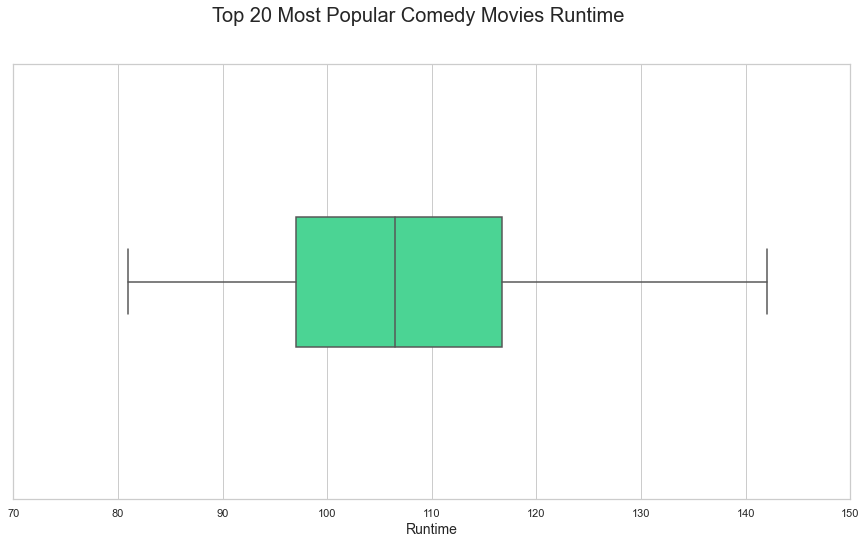

In [234]:
fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_comedy, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Comedy Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

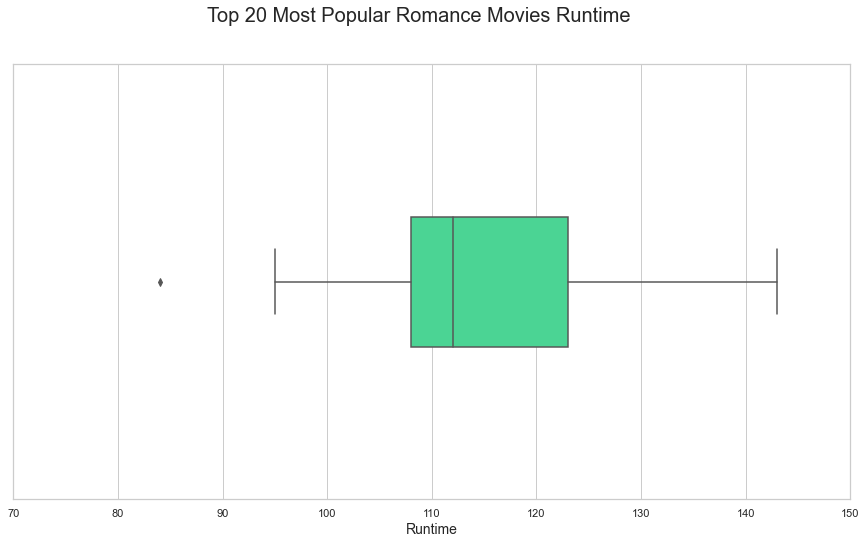

In [238]:
df_romance = df_temp[df_temp['genres']== 'Romance']

top_20_pop_romance = df_romance[['popularity','runtime']]
top_20_pop_romance = top_20_pop_romance.sort_values(by="popularity", ascending=False).head(20)

top_20_romance = top_20_pop_romance['runtime']
top_20_romance

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_romance, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Romance Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

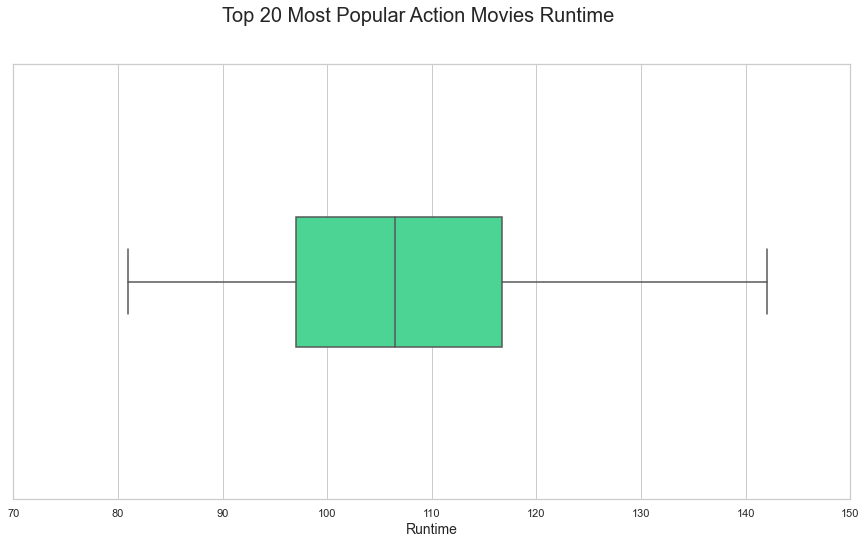

In [237]:
df_action = df_temp[df_temp['genres']== 'Action']

top_20_pop_action = df_action[['popularity','runtime']]
top_20_pop_action = top_20_pop_action.sort_values(by="popularity", ascending=False).head(20)

top_20_action = top_20_pop_action['runtime']
top_20_action

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_comedy, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Action Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

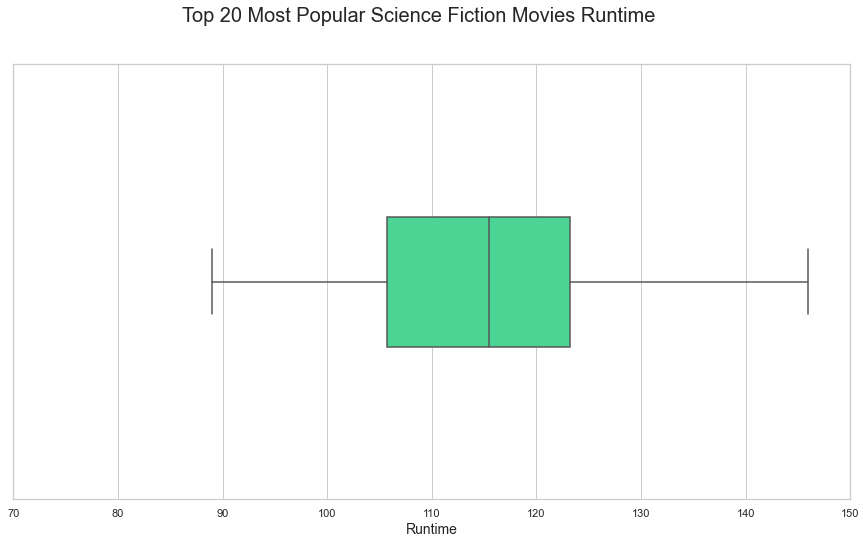

In [236]:
df_scifi = df_temp[df_temp['genres']== 'Science Fiction']

top_20_pop_scifi = df_scifi[['popularity','runtime']]
top_20_pop_scifi = top_20_pop_scifi.sort_values(by="popularity", ascending=False).head(20)

top_20_scifi = top_20_pop_scifi['runtime']
top_20_scifi

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_scifi, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Science Fiction Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

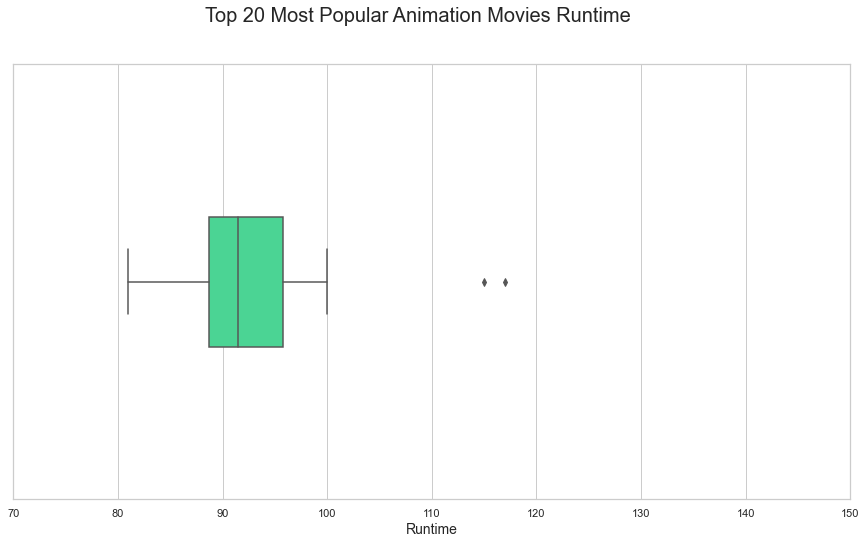

In [235]:
df_animation = df_temp[df_temp['genres']== 'Animation']

top_20_pop_animation = df_animation[['popularity','runtime']]
top_20_pop_animation = top_20_pop_animation.sort_values(by="popularity", ascending=False).head(20)

top_20_animation = top_20_pop_animation['runtime']
top_20_animation

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_animation, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Animation Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

In [231]:
top_20_pop_animation = df_animation[['popularity','runtime']]
top_20_pop_animation = top_20_pop_animation.sort_values(by="popularity", ascending=False).head(20)
top_20_pop_animation

,popularity,runtime
8,7.404165,91
4180,4.782688,89
3913,4.467513,81
8068,4.282462,81
9179,4.143585,83
8243,3.966538,90
6556,3.941265,117
5434,3.928789,98
9316,3.852269,84
1924,3.791881,95
